In [1]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/data/spotify.sqlite')

In [4]:
cur = conn.cursor()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
query = """
SELECT
    name AS track_name,
    popularity
FROM tracks
WHERE popularity IS NOT NULL
ORDER BY popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

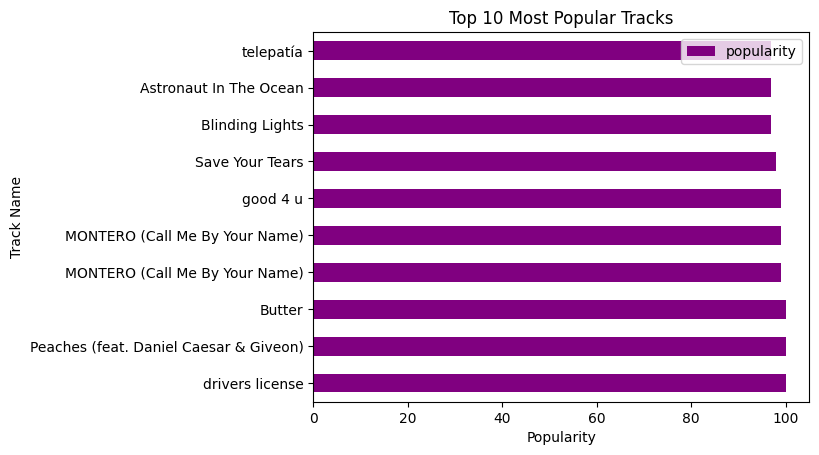

In [8]:
import matplotlib.pyplot as plt

df.plot(kind='barh', x='track_name', y='popularity', color='purple', title="Top 10 Most Popular Tracks")
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.show()


"Drivers License" is the most popular track, leading the top 10 list of widely loved songs.

In [9]:
query = """
SELECT
    energy,
    danceability,
    tempo,
    loudness,
    valence,
    popularity
FROM audio_features
JOIN tracks ON audio_features.id = tracks.id
WHERE popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)


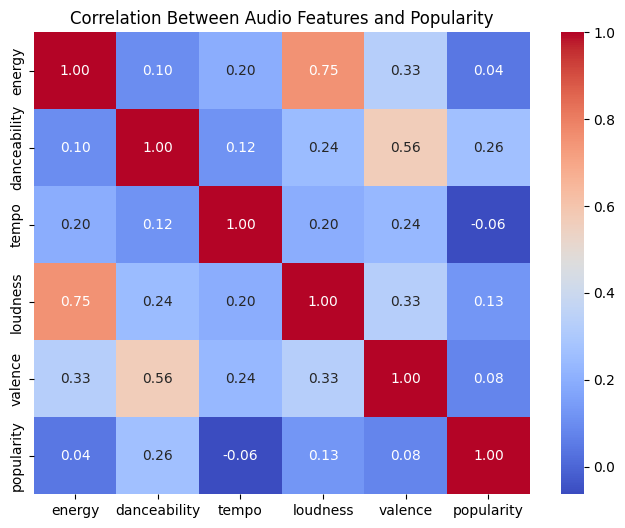

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Audio Features and Popularity")
plt.show()


Energy and loudness are strongly related, danceability and valence moderately so, but popularity shows little correlation with audio features.

In [11]:
query = '''SELECT
    artists.name AS artist_name,
    artists.followers AS follower_count,
    AVG(tracks.popularity) AS avg_track_popularity
FROM artists
JOIN r_track_artist ON artists.id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY artists.id
ORDER BY follower_count DESC
LIMIT 10;'''
df = pd.read_sql(query, conn)

In [13]:
import plotly.express as px
fig = px.bar(
    df,
    x='follower_count',
    y='artist_name',
    color='avg_track_popularity',
    orientation='h',
    labels={'follower_count': 'Follower Count', 'artist_name': 'Artist Name', 'avg_track_popularity': 'Avg Track Popularity'},
    title="Top 10 Artists by Followers and Avg Track Popularity",
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_title="Follower Count", yaxis_title="Artist Name")
fig.show()

The chart shows that Ed Sheeran has the highest follower count, but artists like Billie Eilish and Taylor Swift have higher average track popularity

In [14]:

query = """
SELECT
    genres.id AS genre_id,
    AVG(tracks.popularity) AS avg_popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY avg_popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import plotly.express as px

fig = px.bar(df, x='avg_popularity', y='genre_id', orientation='h',
             title="Top 10 Genres by Average Popularity",
             labels={'avg_popularity': 'Average Popularity', 'genre_id': 'Genre ID'},
             color='avg_popularity', color_continuous_scale='Viridis')

fig.show()

The chart shows that "Instrumental Lullaby" is the most popular genre on average, followed by "Dream SMP," indicating a preference for calming or niche music among listeners.

<ipython-input-15-8ccf5ce48b83>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




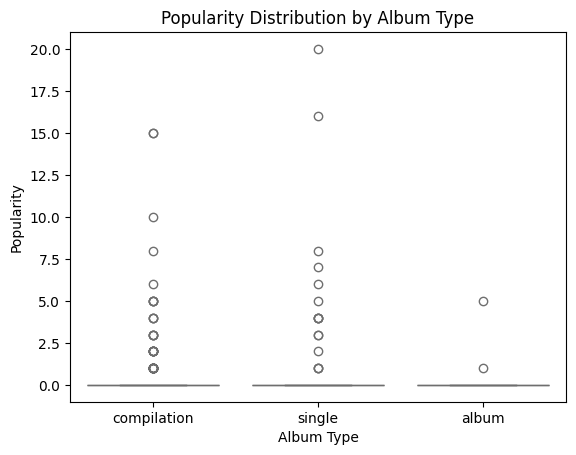

In [15]:
query = """
SELECT
    albums.album_type,
    tracks.popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
WHERE albums.album_type IS NOT NULL AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)


import seaborn as sns

sns.boxplot(x='album_type', y='popularity', data=df, palette='coolwarm')
plt.title("Popularity Distribution by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Popularity")
plt.show()

The chart shows that popularity scores are similarly low across all album types, with no significant variation in distribution between compilations, singles, and albums.

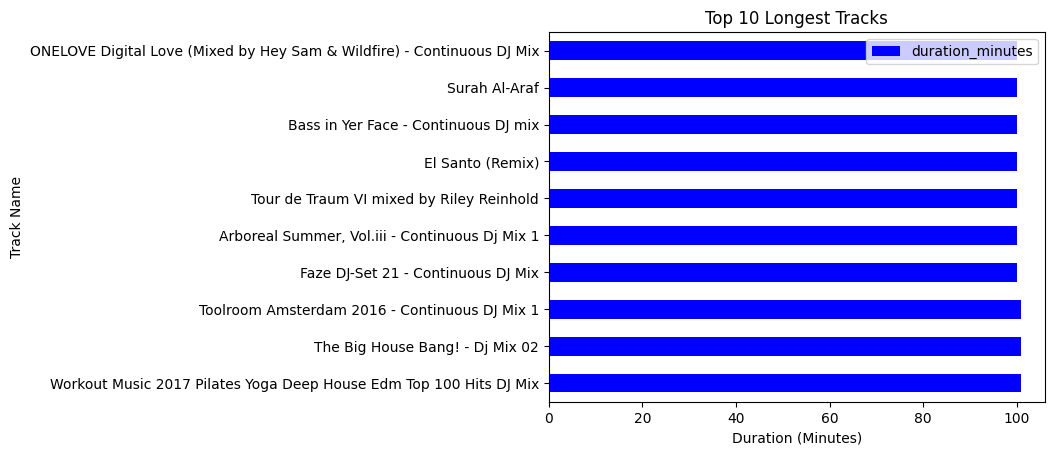

In [16]:
query = """
SELECT
    tracks.name AS track_name,
    audio_features.duration / 60000 AS duration_minutes
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
ORDER BY duration_minutes DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
df.plot(kind='barh', x='track_name', y='duration_minutes', color='blue', title="Top 10 Longest Tracks")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Track Name")
plt.show()

The chart shows that the longest tracks are mostly DJ mixes

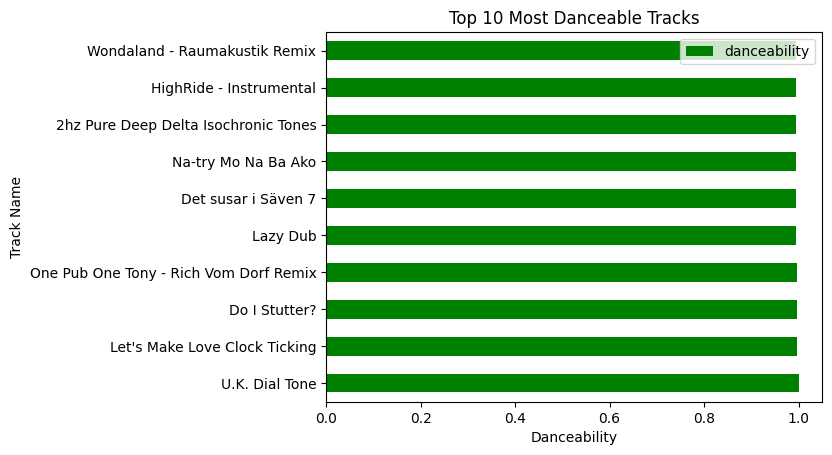

In [18]:

query = """
SELECT
    tracks.name AS track_name,
    audio_features.danceability
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
ORDER BY audio_features.danceability DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
df.plot(kind='barh', x='track_name', y='danceability', color='green', title="Top 10 Most Danceable Tracks")
plt.xlabel("Danceability")
plt.ylabel("Track Name")
plt.show()


The chart shows the top 10 most danceable tracks, with all of them having very high danceability scores, making them great for parties or dancing.

<ipython-input-19-55fcf29bc8ec>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




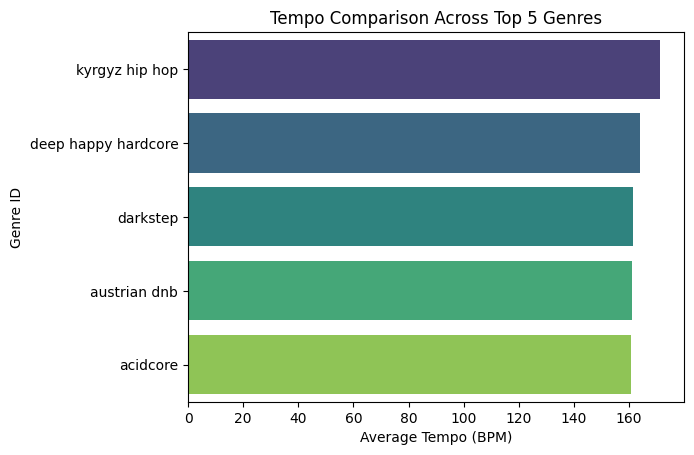

In [19]:
query = """
SELECT
    genres.id AS genre_id,
    AVG(audio_features.tempo) AS avg_tempo
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN audio_features ON r_track_artist.track_id = audio_features.id
GROUP BY genres.id
ORDER BY avg_tempo DESC
LIMIT 5;
"""
df = pd.read_sql(query, conn)

sns.barplot(data=df, x='avg_tempo', y='genre_id', palette='viridis')
plt.title("Tempo Comparison Across Top 5 Genres")
plt.xlabel("Average Tempo (BPM)")
plt.ylabel("Genre ID")
plt.show()

The chart shows that "Acidcore" has the highest average tempo, making it the fastest-paced genre among the top five, while "Kyrgyz Hip Hop" has the slowest tempo.

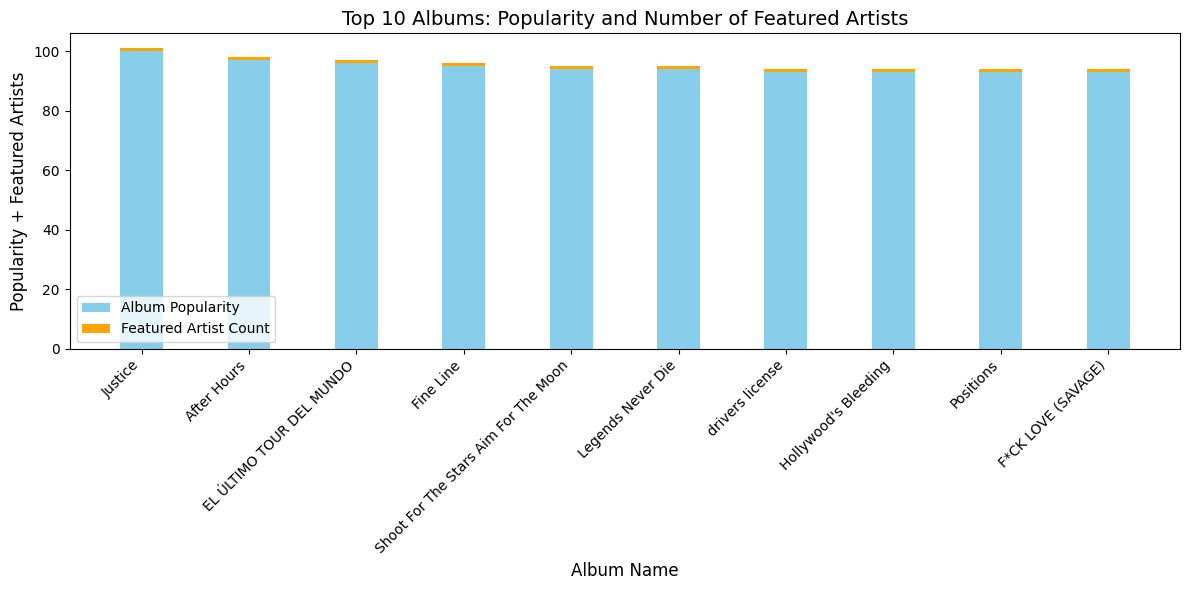

In [20]:
query = """
SELECT
    albums.name AS album_name,
    COUNT(artists.id) AS featured_artist_count,
    albums.popularity AS album_popularity
FROM albums
JOIN r_albums_artists ON albums.id = r_albums_artists.album_id
JOIN artists ON r_albums_artists.artist_id = artists.id
WHERE albums.popularity IS NOT NULL
GROUP BY albums.id
ORDER BY album_popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12, 6))

bar_width = 0.4
index = range(len(df))

plt.bar(index, df['album_popularity'], bar_width, label='Album Popularity', color='skyblue')
plt.bar(index, df['featured_artist_count'], bar_width, bottom=df['album_popularity'], label='Featured Artist Count', color='orange')

plt.xlabel("Album Name", fontsize=12)
plt.ylabel("Popularity + Featured Artists", fontsize=12)
plt.title("Top 10 Albums: Popularity and Number of Featured Artists", fontsize=14)
plt.xticks(index, df['album_name'], rotation=45, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()


The chart shows that all top 10 albums have very high popularity, and the number of featured artists is consistently low, indicating that these albums succeed regardless of collaborations.

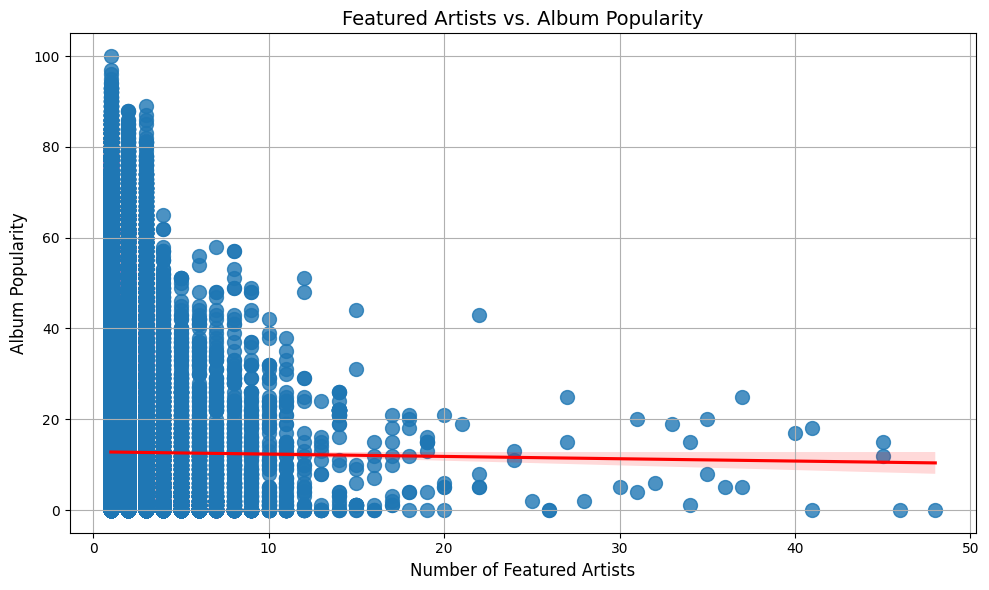

In [21]:
import seaborn as sns
query = """
SELECT
    albums.name AS album_name,
    COUNT(artists.id) AS featured_artist_count,
    albums.popularity AS album_popularity
FROM albums
JOIN r_albums_artists ON albums.id = r_albums_artists.album_id
JOIN artists ON r_albums_artists.artist_id = artists.id
WHERE albums.popularity IS NOT NULL
GROUP BY albums.id
ORDER BY album_popularity DESC;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='featured_artist_count', y='album_popularity', scatter_kws={'s':100}, line_kws={'color':'red'})

plt.title("Featured Artists vs. Album Popularity", fontsize=14)
plt.xlabel("Number of Featured Artists", fontsize=12)
plt.ylabel("Album Popularity", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


The scatterplot shows no strong relationship between the number of featured artists and album popularity, suggesting that having more collaborations doesn’t necessarily make an album more popular.

In [23]:
import plotly.express as px

query = """
SELECT
    tracks.popularity,
    audio_features.tempo,
    audio_features.energy,
    ABS(audio_features.loudness) AS loudness
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE tracks.popularity IS NOT NULL
  AND audio_features.tempo IS NOT NULL
  AND audio_features.energy IS NOT NULL
  AND audio_features.loudness IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

fig = px.scatter(
    df,
    x='tempo',
    y='energy',
    size='loudness',
    color='popularity',
    labels={'tempo': 'Tempo (BPM)', 'energy': 'Energy', 'popularity': 'Popularity', 'loudness': 'Loudness'},
    title="Bubble Chart: Popularity, Tempo, and Energy (Bubble Size = Loudness)",
    template="plotly_dark"
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(xaxis_title="Tempo (BPM)", yaxis_title="Energy")
fig.show()


The bubble chart shows that tracks with higher energy and tempo tend to have higher popularity, with larger bubbles (louder tracks) often appearing in the more popular range.

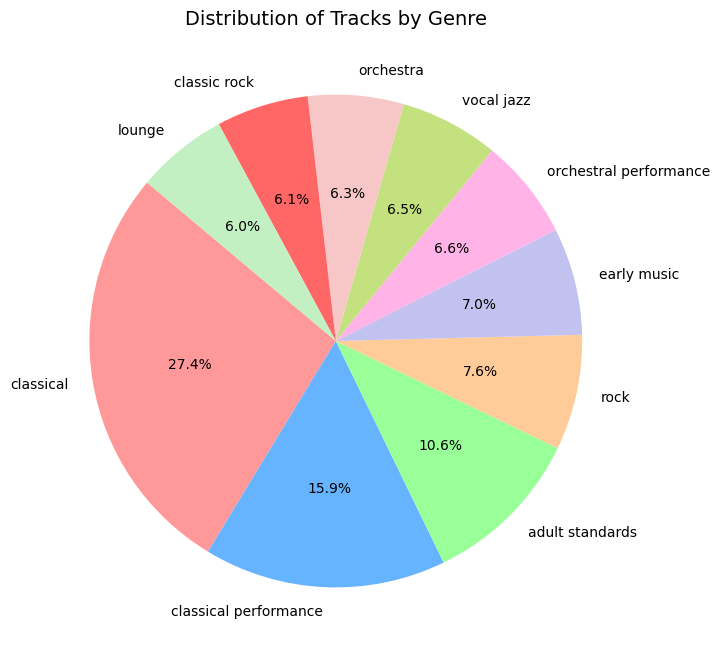

In [27]:

query = """
SELECT
    genres.id AS genre_id,
    COUNT(tracks.id) AS track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
WHERE genres.id IS NOT NULL
GROUP BY genres.id
ORDER BY track_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(8, 8))
plt.pie(df['track_count'], labels=df['genre_id'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#f7c7c7', '#ff6666', '#c2f0c2'])

plt.title("Distribution of Tracks by Genre", fontsize=14)
plt.show()


The pie chart shows that the "Classical" genre has the most tracks (27.4%), followed by "Classical Performance" (15.9%), while other genres like "Lounge" and "Orchestra" make up smaller portions.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

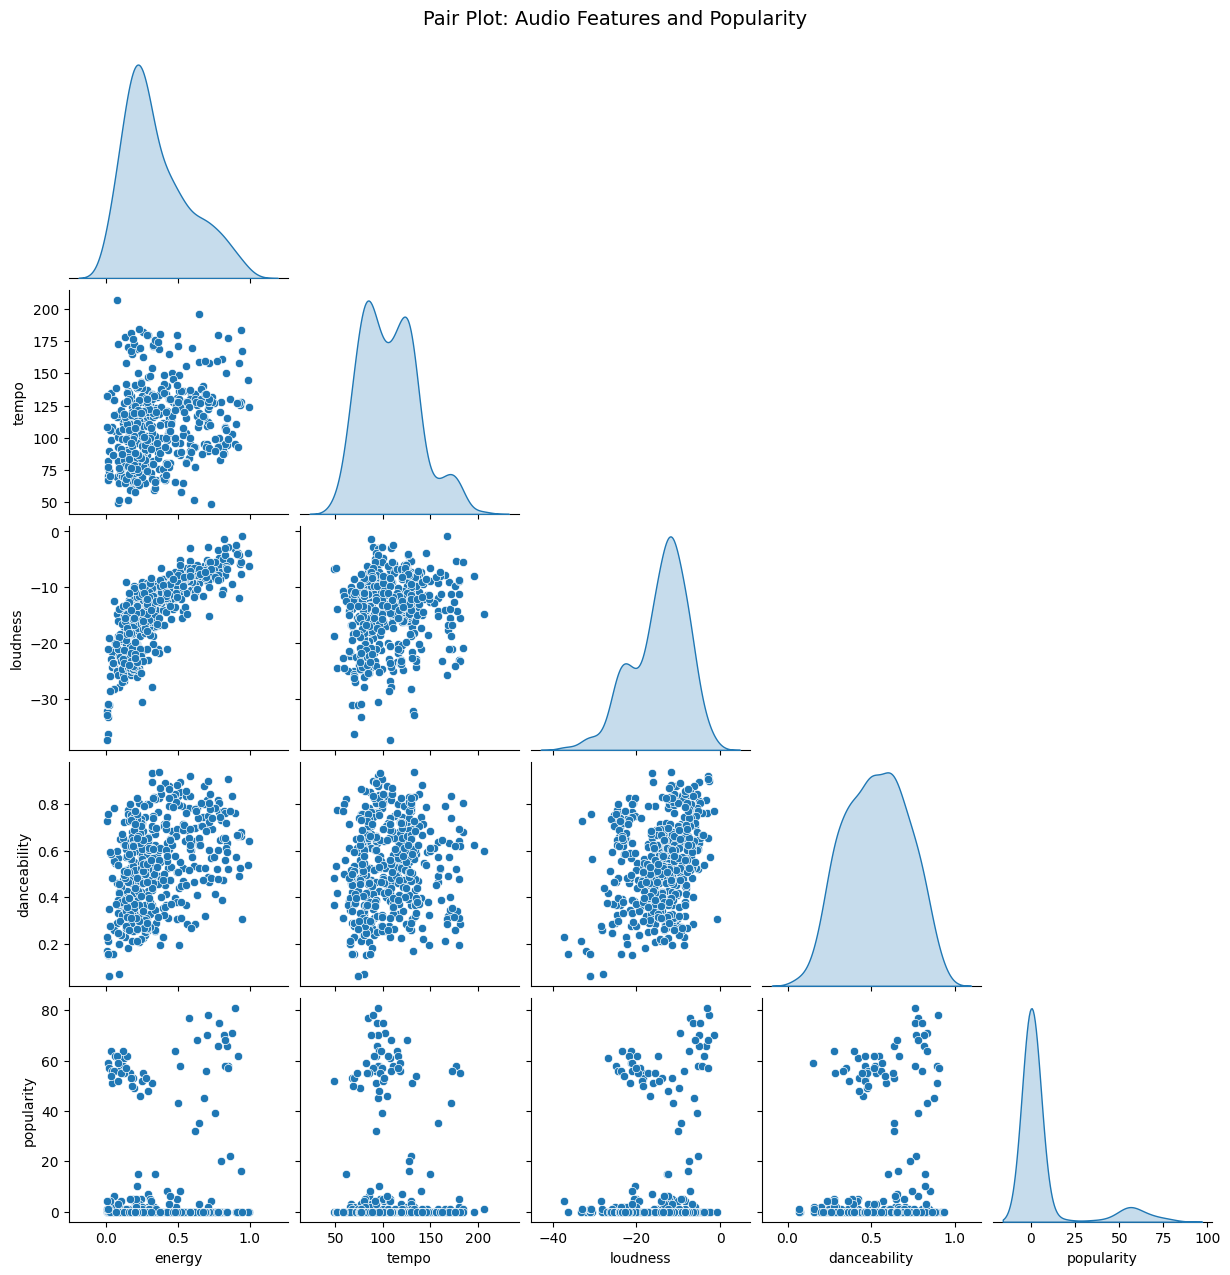

In [29]:
query = """
SELECT
    audio_features.energy,
    audio_features.tempo,
    audio_features.loudness,
    audio_features.danceability,
    tracks.popularity
FROM audio_features
JOIN tracks ON audio_features.id = tracks.id
WHERE audio_features.energy IS NOT NULL
  AND audio_features.tempo IS NOT NULL
  AND audio_features.loudness IS NOT NULL
  AND audio_features.danceability IS NOT NULL
  AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

sns.pairplot(df, vars=['energy', 'tempo', 'loudness', 'danceability', 'popularity'], diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle("Pair Plot: Audio Features and Popularity", y=1.02, fontsize=14)
plt.show()


The pair plot shows that there’s no strong link between features like energy, tempo, or danceability and popularity, but loudness and energy are closely connected, meaning louder songs are often more energetic.

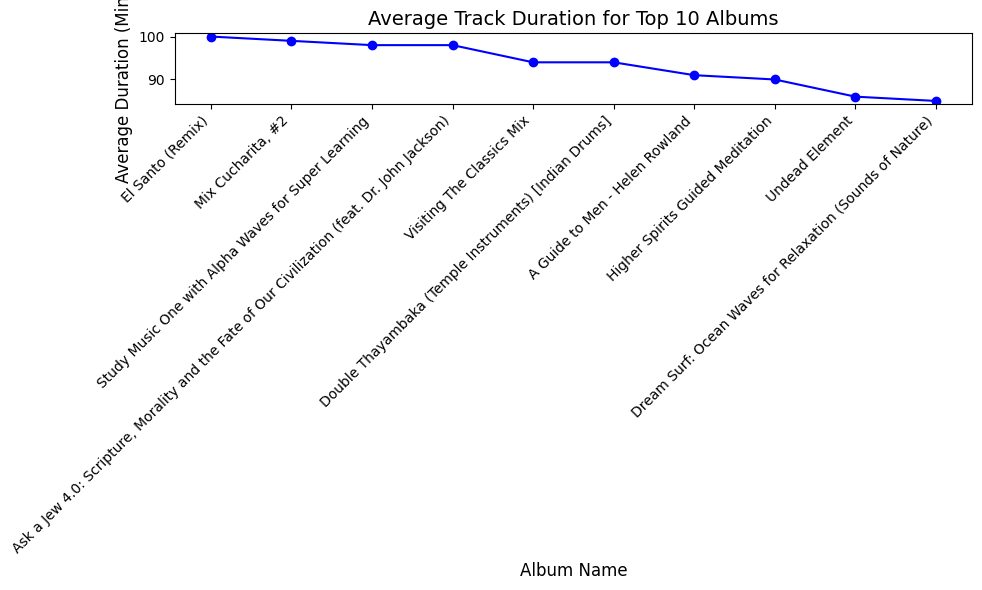

In [30]:
query = """
SELECT
    albums.name AS album_name,
    AVG(audio_features.duration / 60000) AS avg_duration_minutes
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN audio_features ON r_albums_tracks.track_id = audio_features.id
GROUP BY albums.name
ORDER BY avg_duration_minutes DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.plot(df['album_name'], df['avg_duration_minutes'], marker='o', linestyle='-', color='blue')

plt.title("Average Track Duration for Top 10 Albums", fontsize=14)
plt.xlabel("Album Name", fontsize=12)
plt.ylabel("Average Duration (Minutes)", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
